# Human evaluation analysis

In this section, we will analyze the data of obtained from the survey. In other words, we will see the rate of acceptability of the names in the corpus generated by our model. The source of this data comes from the evaluation of the corpus by 81 anonymous users speakers of the venezuelan dialect and, also, speakers from other hispanic dialects. 

In [218]:
import pandas as pd #for reading and manipulating 
import re #Regular expressions
import numpy as np #for manipulating arrays
import matplotlib 

In [219]:
#Read CSV with evaluation data
data= 'human_evaluation/extended_venezuelan_names_human_evaluation.csv'
df= pd.read_csv(data) #full dataframe


In [220]:
#Dropping duplicates 

columns= list(df.keys()) #See duplicated columns
filtered_items = [item for item in columns if re.search(r'\.\d+$', item)] # Filter items using regular expression

for i in filtered_items: #looks at all items in filtered list and drops columns
    df.drop(columns=[i])

In [221]:
total_sample= df.keys()[2:] #full sample with names
print(f'total number of names in sample:{len(total_sample)}')

total number of names in sample:169


In [222]:
#Translating answers to numeric data 

# Function to convert alphabetic data into numbers
def binarizing_data(label):
    if 'No' in label:
        return 0
    elif 'Sí' in label:
        return 1

for i in list(df.keys()[1:]):
    df[i] = df[i].apply(lambda x: binarizing_data(x))

In [223]:
#Splitting participants 
df_v= df[df['¿Eres de nacionalidad venezolana?']==1] #data from people who are venezuelan speakers. 67
df_f= df[df['¿Eres de nacionalidad venezolana?']==0] #data from people who are not venezuelan speakers. 14

In [224]:
#Calculates acceptability of names 

def acceptability(dataframe, list_of_names): 
    output = {} #all outputs
    for i in list_of_names:
        data= dataframe[i].values #takes values of a single name
        number= sum(data) / len(data) #calculates rate of acceptability in relation to number of participants
        output[i]=number
    return output  

v_acceptability= acceptability(df_v, total_sample)  
f_acceptability= acceptability(df_f, total_sample)   

In [225]:
#Mean of acceptability 

mean_v = np.asarray(list(v_acceptability.values())).mean() #for venezuelan speakers
mean_f = np.asarray(list(f_acceptability.values())).mean() #for non-venezuelan speakers (i.e. speakers of other (hispanic) dialects)
overall_mean= (67/81)*mean_v + (14/81)*mean_f

print(f'Acceptability by venezuelan speakers:{mean_v}')
print(f'Acceptability by non-venezuelan speakers:{mean_f}')
print(f'Overall acceptability:{overall_mean}')

Acceptability by venezuelan speakers:0.4645411993287997
Acceptability by non-venezuelan speakers:0.5097210481825866
Overall acceptability:0.47235006209365177


## Analysing average lenght in names

 This section is dedicated to breaking down the structure of the generated names by seeing the average lenght of the words generated by our model. Names perceived as most acceptable (i.e. < 0.50 of acceptability) and less acceptable (i.e. > 0.50 of acceptability) are analyzed separately. We do this in order to determine whether there are notable differences within these structures that might offer possible explanations for the acceptability of these names.

In [226]:
import pylabeador
import re
import matplotlib.pyplot as plt
import nltk
from nltk.probability import FreqDist
from nltk.util import ngrams

In [227]:
#Acceptability of all names 
all_names= acceptability(df, total_sample)


#Function to filter dictionary by percentage higher than 50%
def most_acceptable(dictionary):
    filtered_dict = {name: rate for name, rate in dictionary.items() if rate > 0.50}
    return filtered_dict

def less_acceptable(dictionary):
    filtered_dict = {name: rate for name, rate in dictionary.items() if rate < 0.50}
    return filtered_dict

#Filter the dictionary
most_acceptable_names= most_acceptable(all_names) # < 0.50 of acceptability 
less_acceptable_names= less_acceptable(all_names) # > 0.50 of acceptability

#Corpus of names divided by rate of acceptability 
corpus_acceptable_names= list(most_acceptable_names.keys())
corpus_less_acceptable_names=list(less_acceptable_names.keys())

In [228]:
print('Most acceptable names')
print(corpus_acceptable_names)
print('\n')
print('Less acceptable names')
print(corpus_less_acceptable_names)

Most acceptable names
['maría josé cristina', 'yatriz', 'maría helyn', 'flory', 'corin', 'yula', 'manuel alerith', 'fabiania', 'yumelicia', 'josé josé', 'noela', 'yenis', 'bela', 'maribella', 'ales', 'andra', 'francio', 'pedro josé jescar', 'gerson', 'carolin', 'aleria angel', 'ilia', 'wilfreddy', 'pedro dauel', 'karelys', 'glena', 'gus', 'maría virgin', 'johnny', 'maría fernandreana', 'angelenda', 'mariel alenessa', 'maría gabriel anrancio', 'mar', 'maría josé enriquel', 'nubio', 'lydi', 'alena', 'jaco.1', 'georgariel carlos', 'nella', 'josé jesus', 'maría heloína', 'maría virginya', 'neida', 'zaniel', 'alejandrés', 'lulia', 'yenis.1', 'pedro dania', 'nauel', 'beth', 'jealifer', 'yenira', 'mar.1', 'dalecia', 'francio.1', 'maría alerina', 'nataly', 'alerina', 'kathe', 'yaico', 'coro', 'manuelyn', 'natalica', 'miguel alejaneía', 'juan manuel caro', 'maría fer', 'mar.2', 'dania', 'sara', 'mar.3', 'carmelica', 'margaria angy', 'zoraly', 'luisabeth', 'aleja', 'josé antonela', 'oscardo', 'a

In [229]:
#Lenght of names 

lenght_m_acceptable= np.asarray([len(w) for w in corpus_acceptable_names])
lenght_l_acceptable= np.asarray([len(w) for w in corpus_less_acceptable_names])

print(f'Mean of lenght of acceptable names:{lenght_m_acceptable.mean()}')
print(f'Standard deviation of acceptable names:{lenght_m_acceptable.std()}')
print(f'Mean of lenght of less acceptable names:{lenght_l_acceptable.mean()}')
print(f'Standard deviation of less acceptable names:{lenght_l_acceptable.std()}')

Mean of lenght of acceptable names:8.55421686746988
Standard deviation of acceptable names:4.600295988508148
Mean of lenght of less acceptable names:7.6395348837209305
Standard deviation of less acceptable names:4.518470596103607


In [230]:
#Segmenting text into syllabes 

def segment_word(list_w_names):
    out= []
    for name in list_w_names:
        if ' ' in name:
            x= name.split(' ')
            for i in x:
               try: 
                  seg_name= pylabeador.syllabify(i)
                  out.append(seg_name) 
               except:
                  print(f'Could not segment {name}')
        else:
           try: 
              seg_name= pylabeador.syllabify(name)
              out.append(seg_name) 
           except:
               print(f'Could not segment {name}')

    return out


In [231]:
#Number of syllabus per word 

print('For acceptable names')
print('\n')
syllabes_acceptable= segment_word(corpus_acceptable_names)
print('\n')
print(f'Sample of variable:{syllabes_acceptable[:10]}')
syl_m_acceptable= np.asarray([len(w) for w in syllabes_acceptable])
print('\n')
print(f'Mean of lenght of acceptable names:{syl_m_acceptable.mean()}')
print(f'Standard deviation of acceptable names:{syl_m_acceptable.var()}')
print('\n')
print('For less acceptable names')
print('\n')
syllabes_less_acceptable= segment_word(corpus_less_acceptable_names)
syl_l_acceptable=np.asanyarray([len(w) for w in syllabes_less_acceptable])
print('\n')
print(f'Sample of variable:{syllabes_less_acceptable[:10]}')
print('\n')
print(f'Mean of lenght of less acceptable names:{syl_l_acceptable.mean()}')
print(f'Standard deviation of less acceptable names:{syl_l_acceptable.var()}')


For acceptable names


Could not segment maría helyn
Could not segment karelys
Could not segment lydi
Could not segment jaco.1
Could not segment yenis.1
Could not segment mar.1
Could not segment francio.1
Could not segment manuelyn
Could not segment mar.2
Could not segment mar.3


Sample of variable:[['ma', 'rí', 'a'], ['jo', 'sé'], ['cris', 'ti', 'na'], ['ya', 'triz'], ['ma', 'rí', 'a'], ['flo', 'ry'], ['co', 'rin'], ['yu', 'la'], ['ma', 'nuel'], ['a', 'le', 'rith']]


Mean of lenght of acceptable names:2.6153846153846154
Standard deviation of acceptable names:0.7751479289940828


For less acceptable names


Could not segment  maría del alejandrésan
Could not segment ara.1
Could not segment yggega
Could not segment blepdyyn
Could not segment alomoto.1
Could not segment maro.1
Could not segment alomoto.2
Could not segment  valejanda


Sample of variable:[['stes'], ['eu', 'ma', 'rí', 'a'], ['del'], ['ma', 'rí', 'a'], ['de'], ['la'], ['he', 'le', 'vin'], ['o', 'li', 'ma'], ['gau', 'ra'],

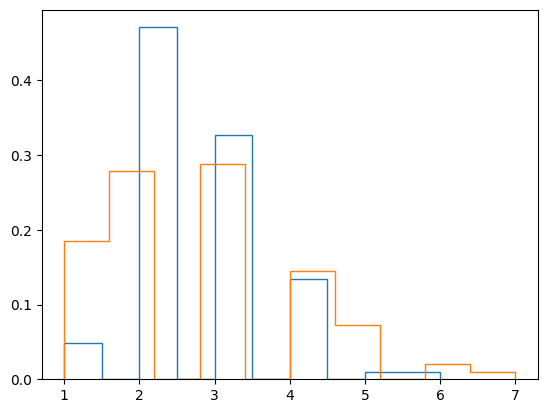

In [232]:
#Histogram

counts, bins = np.histogram(np.asarray(syl_m_acceptable))
plt.stairs(counts/counts.sum(), bins)
counts, bins = np.histogram(np.asarray(syl_l_acceptable))
plt.stairs(counts/counts.sum(), bins)
#plt.savefig('histogram_evaluation.jpg')
plt.show()
